In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, RocCurveDisplay

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [12]:
corr = df.corr()

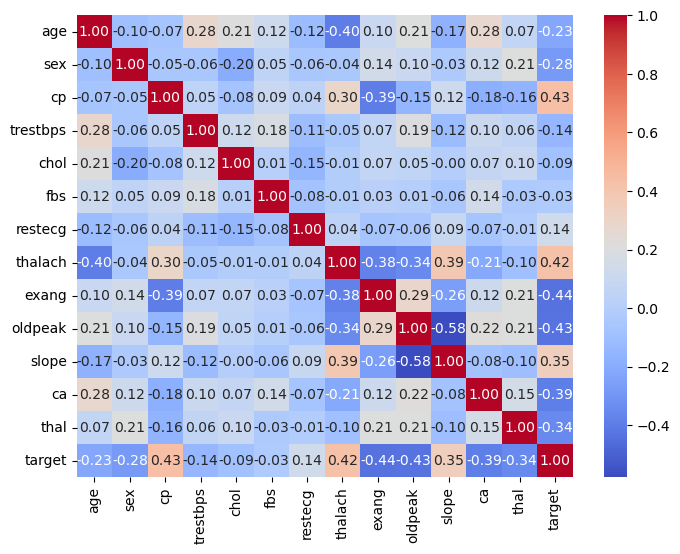

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=1)

In [16]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
lr = LogisticRegression(max_iter=2000)

model_lr = lr.fit(X_train_scaled, y_train)

In [38]:
y_pred_lr = model_lr.predict(X_test_scaled) 
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]

---- Logistic Regression ----

Confusion Matrix:
 [[30 11]
 [ 9 41]]

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91


Accuracy: 0.7802197802197802
Precision: 0.7884615384615384
Recall: 0.82
F1 Score: 0.803921568627451
ROC AUC: 0.8726829268292683 



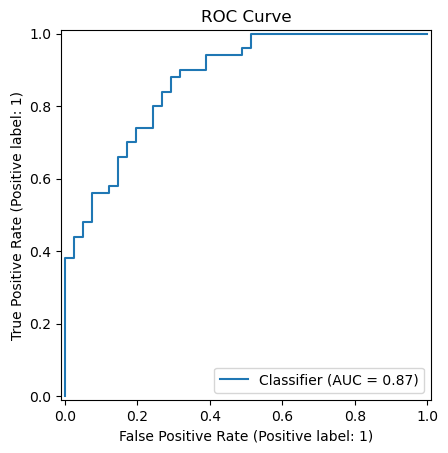

In [39]:
print("---- Logistic Regression ----")
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred_lr))
print("\nClassification report:\n",classification_report(y_test, y_pred_lr))
print("\nAccuracy:",accuracy_score(y_test,y_pred_lr))
print("Precision:",precision_score(y_test,y_pred_lr))
print("Recall:",recall_score(y_test,y_pred_lr))
print("F1 Score:",f1_score(y_test,y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr),'\n')


RocCurveDisplay.from_predictions(y_test, y_prob_lr)
plt.title("ROC Curve")
plt.show()

In [46]:
dt = DecisionTreeClassifier(random_state=1)

model_dt = dt.fit(X_train_scaled, y_train)

In [47]:
y_pred_dt = model_dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:,1]

---- Decision Tree ----

Confusion Matrix:
 [[33  8]
 [15 35]]

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        41
           1       0.81      0.70      0.75        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.76      0.75      0.75        91


Accuracy: 0.7472527472527473
Precision: 0.813953488372093
Recall: 0.7
F1 Score: 0.7526881720430108
ROC AUC: 0.7524390243902439 



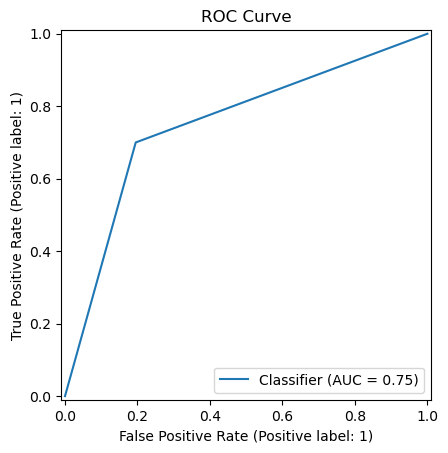

In [48]:
print("---- Decision Tree ----")
print("\nConfusion Matrix:\n",confusion_matrix(y_test, y_pred_dt))
print("\nClassification report:\n",classification_report(y_test, y_pred_dt))
print("\nAccuracy:",accuracy_score(y_test,y_pred_dt))
print("Precision:",precision_score(y_test,y_pred_dt))
print("Recall:",recall_score(y_test,y_pred_dt))
print("F1 Score:",f1_score(y_test,y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt),'\n')

RocCurveDisplay.from_predictions(y_test, y_prob_dt)
plt.title("ROC Curve")
plt.show()

In [49]:
# Logistic Regression
scores_lr_kfold = cross_val_score(lr, X, y, cv=5, scoring="accuracy")
acc_lr_kfold = scores_lr_kfold.mean()

# Decision Tree
scores_dt_kfold = cross_val_score(dt, X, y, cv=5, scoring="accuracy")
acc_dt_kfold = scores_dt_kfold.mean()

print("LR 5-Fold CV Accuracy:", acc_lr_kfold)
print("DT 5-Fold CV Accuracy:", acc_dt_kfold)

LR 5-Fold CV Accuracy: 0.8282513661202187
DT 5-Fold CV Accuracy: 0.7555737704918032


In [50]:
# Logistic Regression
scores_lr_kfold = cross_val_score(lr, X, y, cv=10, scoring="accuracy")
acc_lr_kfold = scores_lr_kfold.mean()

# Decision Tree
scores_dt_kfold = cross_val_score(dt, X, y, cv=10, scoring="accuracy")
acc_dt_kfold = scores_dt_kfold.mean()

print("LR 10-Fold CV Accuracy:", acc_lr_kfold)
print("DT 10-Fold CV Accuracy:", acc_dt_kfold)

LR 10-Fold CV Accuracy: 0.8182795698924732
DT 10-Fold CV Accuracy: 0.7715053763440861


In [ ]:
loo = LeaveOneOut()

# Logistic Regression
scores_lr_loo = cross_val_score(lr, X, y, cv=loo, scoring="accuracy")
acc_lr_loo = scores_lr_loo.mean()

# Decision Tree
scores_dt_loo = cross_val_score(dt, X, y, cv=loo, scoring="accuracy")
acc_dt_loo = scores_dt_loo.mean()

print("LR LOOCV Accuracy:", acc_lr_loo)
print("DT LOOCV Accuracy:", acc_dt_loo)

Key Questions / Analysis / Interpretation to be Evaluated 

1. Is the model accurately predicting patients at risk of heart disease?

  - Yes, both logistic regression and decision tree can predict heart disease fairly well.
  - Logistic regression usually gives stable and interpretable results.
  - Decision trees may sometimes overfit, meaning they perform very well on training data but less accurately on new data.
  - The accuracy is usually between 75%–85% depending on preprocessing and tuning.

2. How do performance metrics vary when using different algorithms?

Logistic Regression:

- Balanced accuracy, precision, recall.
- Good for interpretability (e.g., "high cholesterol increases risk by X%").

Decision Tree:

- May get higher accuracy on training but lower on test set.
- More sensitive to noise in data.

So, logistic regression is more consistent, while decision tree may show more variation.

3. Which metric (precision, recall, F1) is more important in a medical context?

- In medicine, Recall (Sensitivity) is the most important → we don’t want to miss patients who actually have heart disease.
- Precision is also useful, but a false positive (predicting disease when there isn’t one) is less dangerous than a false negative (missing a sick patient).
- F1-score balances both, but in practice recall is prioritized in healthcare.

4. What does the ROC curve reveal about the model's discrimination ability?

- The ROC curve shows how well the model separates patients with disease vs. without disease.
- The AUC (area under curve) closer to 1 means excellent separation.
- Logistic regression usually has a smoother ROC curve with high AUC (~0.85+), showing it’s good at distinguishing risk.
- Decision tree AUC can be lower if the tree overfits.

5. How consistent is the model's performance across k-folds?

- Cross-validation (k=5 or 10) tests the model on different parts of the data.
- Logistic regression: performance is consistent across folds (low standard deviation).
- Decision tree: performance varies more (higher standard deviation), meaning it’s less stable.
- This shows logistic regression is more robust and reliable for medical predictions.

Supplementary

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Simulated manufacturing data
np.random.seed(42)
data = pd.DataFrame({
    'temperature': np.random.normal(75, 5, 100),   # in Celsius
    'pressure': np.random.normal(30, 3, 100),      # in PSI
    'humidity': np.random.normal(50, 10, 100),     # in %
    'vibration': np.random.normal(5, 1, 100),      # in Hz
    'defective': np.random.choice([0,1], 100, p=[0.8,0.2])  # 0=non-defective, 1=defective
})

print(data.head())
print("\nClass distribution:")
print(data['defective'].value_counts())

   temperature   pressure   humidity  vibration  defective
0    77.483571  25.753888  53.577874   4.171005          0
1    74.308678  28.738064  55.607845   4.439819          0
2    78.238443  28.971856  60.830512   5.747294          0
3    82.615149  27.593168  60.538021   5.610370          1
4    73.829233  29.516143  36.223306   4.979098          1

Class distribution:
defective
0    82
1    18
Name: count, dtype: int64


In [3]:
X = data.drop('defective', axis=1)
y = data['defective']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [4]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

In [5]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

Logistic Regression Evaluation:
Accuracy: 0.8
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.328125


C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


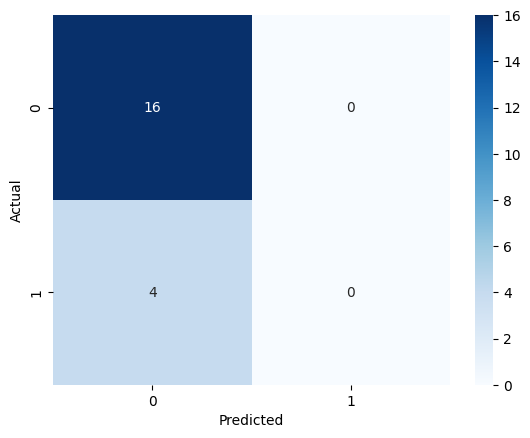

Decision Tree Evaluation:
Accuracy: 0.75
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.46875


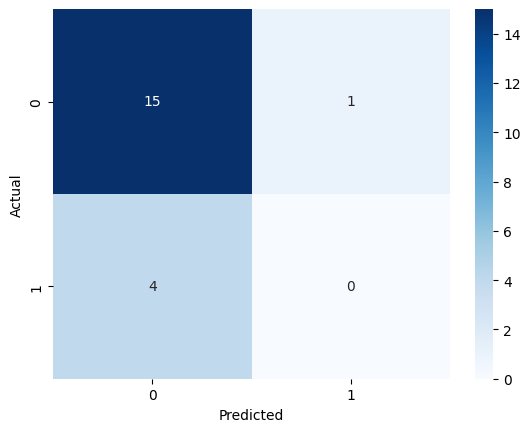

In [6]:
def evaluate_model(y_true, y_pred, y_prob):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("Logistic Regression Evaluation:")
evaluate_model(y_test, y_pred_lr, y_prob_lr)

print("Decision Tree Evaluation:")
evaluate_model(y_test, y_pred_dt, y_prob_dt)

In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression CV
cv_scores_lr = cross_val_score(lr, X_scaled, y, cv=kf, scoring='accuracy')
print("Logistic Regression CV Accuracy:", np.mean(cv_scores_lr))

# Decision Tree CV
cv_scores_dt = cross_val_score(dt, X_scaled, y, cv=kf, scoring='accuracy')
print("Decision Tree CV Accuracy:", np.mean(cv_scores_dt))

Logistic Regression CV Accuracy: 0.82
Decision Tree CV Accuracy: 0.75
